In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv("/content/Health1.csv")
data.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Identify numerical and categorical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Scale numerical features
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Display preprocessed data
print(data.head())


      index  National Provider Identifier  \
0  1.361920                      1.366960   
1 -0.546996                     -0.528945   
2 -0.671133                     -0.665966   
3  0.946316                      0.947412   
4 -1.465509                     -1.477323   

   Last Name/Organization Name of the Provider  First Name of the Provider  \
0                                        39468                       10215   
1                                        18353                       12477   
2                                        10622                        9592   
3                                        12995                        5036   
4                                        29475                         773   

   Middle Initial of the Provider  Credentials of the Provider  \
0                              29                          667   
1                              18                          667   
2                              25                          438

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Health1.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Display summary statistics
print(data.describe())

# Display column information
print(data.info())


     index  National Provider Identifier  \
0  8774979                    1891106191   
1  3354385                    1346202256   
2  3001884                    1306820956   
3  7594822                    1770523540   
4   746159                    1073627758   

  Last Name/Organization Name of the Provider First Name of the Provider  \
0                                 UPADHYAYULA                  SATYASREE   
1                                       JONES                      WENDY   
2                                    DUROCHER                    RICHARD   
3                                     FULLARD                     JASPER   
4                                    PERROTTI                    ANTHONY   

  Middle Initial of the Provider Credentials of the Provider  \
0                            NaN                        M.D.   
1                              P                        M.D.   
2                              W                         DPM   
3                     

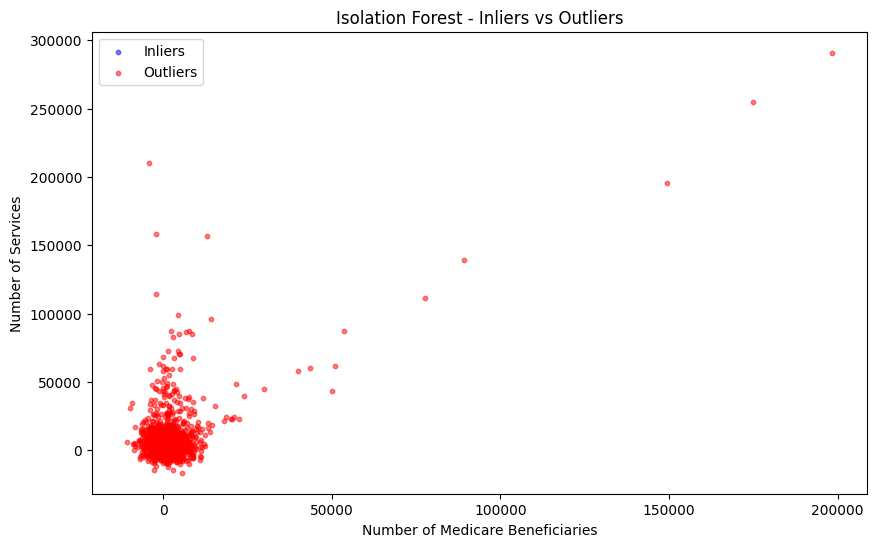

In [3]:
#Isolation Forest
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

# Load the dataset
file_path = '/content/Health1.csv'
data = pd.read_csv(file_path)

# Select the first 10000 rows
data = data.head(100000)

# Select the two numerical features for visualization
selected_features = ['Number of Medicare Beneficiaries', 'Number of Services']

# Remove commas and convert columns to numeric
for col in selected_features:
    data[col] = data[col].astype(str).str.replace(',', '')
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Handle missing values
X = data[selected_features]
X = X.dropna()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the Isolation Forest on the dataset
clf = IsolationForest(contamination=0.01, random_state=42)
clf.fit(X_scaled)

# Predict anomalies in the dataset
y_pred_full = clf.predict(X_scaled)

# Add predictions to the original data
data['Prediction'] = y_pred_full

# Separate inliers and outliers
inliers = data[data['Prediction'] == 1]
outliers = data[data['Prediction'] == -1]

# Function to add jitter
def add_jitter(arr, jitter_strength=0.02):
    stdev = jitter_strength * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

# Visualize the data using the two selected features
plt.figure(figsize=(10, 6))
plt.scatter(add_jitter(inliers[selected_features[0]]), add_jitter(inliers[selected_features[1]]),
            c='blue', label='Inliers', s=10, alpha=0.5)
plt.scatter(add_jitter(outliers[selected_features[0]]), add_jitter(outliers[selected_features[1]]),
            c='red', label='Outliers', s=10, alpha=0.5)
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.legend()
plt.title('Isolation Forest - Inliers vs Outliers')
plt.show()


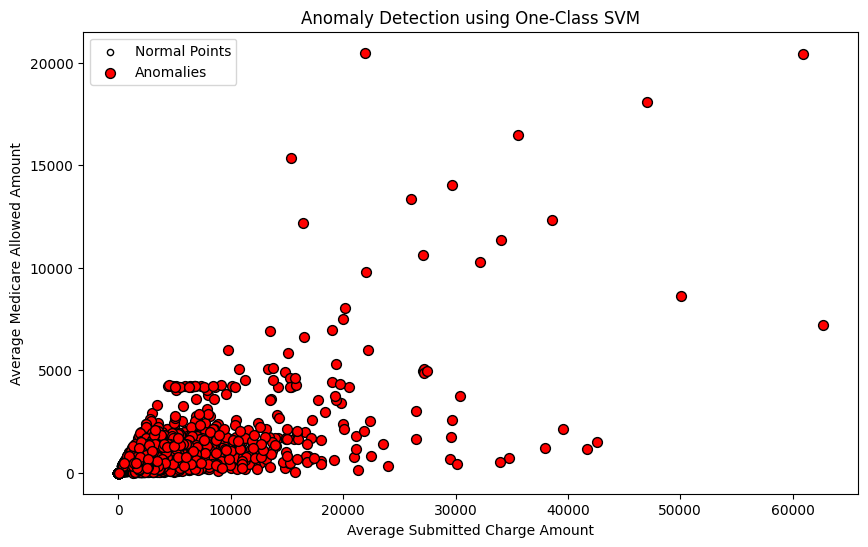

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import svm

# Load the dataset
file_path = '/content/Health1.csv'
data = pd.read_csv(file_path)

# Select the two numerical features for visualization
selected_features = [
    'Average Submitted Charge Amount', 'Average Medicare Allowed Amount'
]

# Remove commas and convert columns to numeric
for col in selected_features:
    data[col] = data[col].astype(str).str.replace(',', '')
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Handle missing values
X = data[selected_features]
X = X.dropna()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set contamination level
contamination = 0.1  # Adjust contamination level as needed

# Train the One-Class SVM on the full dataset
clf = svm.OneClassSVM(nu=contamination, kernel="rbf", gamma=0.1)
clf.fit(X_scaled)

# Predict anomalies in the full dataset
y_pred_full = clf.predict(X_scaled)

# Add the predicted labels to the original dataset
data['Anomaly'] = y_pred_full

# Visualize the results
plt.figure(figsize=(10, 6))

# Plot the normal points
plt.scatter(X['Average Submitted Charge Amount'], X['Average Medicare Allowed Amount'], c='white', edgecolors='k', s=20, label='Normal Points')

# Plot the anomalies
plt.scatter(X[data['Anomaly'] == -1]['Average Submitted Charge Amount'], X[data['Anomaly'] == -1]['Average Medicare Allowed Amount'], c='red', edgecolors='k', s=50, label='Anomalies')

plt.title('Anomaly Detection using One-Class SVM')
plt.xlabel('Average Submitted Charge Amount')
plt.ylabel('Average Medicare Allowed Amount')
plt.legend()
plt.show()


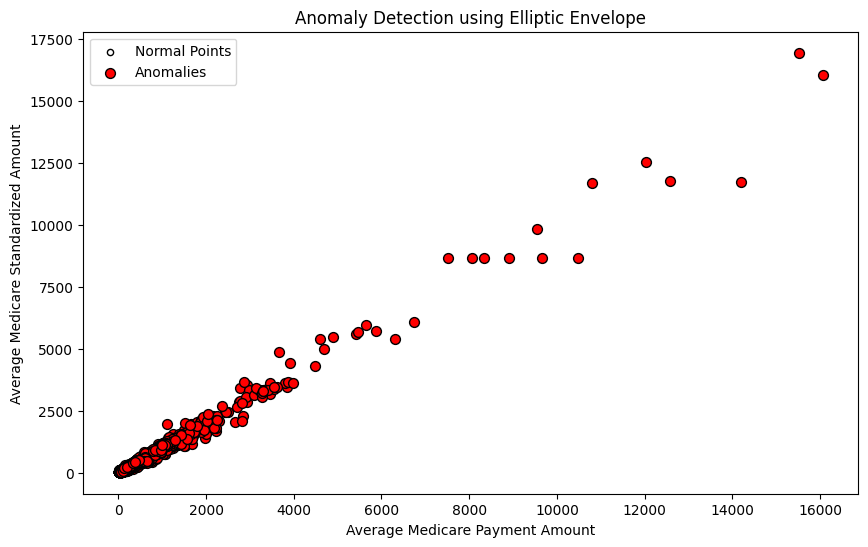

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import EllipticEnvelope

# Load the dataset
file_path = '/content/Health1.csv'
data = pd.read_csv(file_path)

# Select the two numerical features for visualization
selected_features = [
    'Average Medicare Payment Amount', 'Average Medicare Standardized Amount'
]

# Remove commas and convert columns to numeric
for col in selected_features:
    data[col] = data[col].astype(str).str.replace(',', '')
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Handle missing values
X = data[selected_features]
X = X.dropna()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set contamination level
contamination = 0.1  # Adjust contamination level as needed

# Train the Elliptic Envelope on the full dataset
elliptic_env = EllipticEnvelope(contamination=contamination)
elliptic_env.fit(X_scaled)

# Predict anomalies in the full dataset
y_pred_full = elliptic_env.predict(X_scaled)

# Add the predicted labels to the original dataset
data['Anomaly'] = y_pred_full

# Visualize the results
plt.figure(figsize=(10, 6))

# Plot the normal points
plt.scatter(X['Average Medicare Payment Amount'], X['Average Medicare Standardized Amount'], c='white', edgecolors='k', s=20, label='Normal Points')

# Plot the anomalies
plt.scatter(X[data['Anomaly'] == -1]['Average Medicare Payment Amount'], X[data['Anomaly'] == -1]['Average Medicare Standardized Amount'], c='red', edgecolors='k', s=50, label='Anomalies')

plt.title('Anomaly Detection using Elliptic Envelope')
plt.xlabel('Average Medicare Payment Amount')
plt.ylabel('Average Medicare Standardized Amount')
plt.legend()
plt.show()


Number of anomalies in the dataset: 10000
Number of normal points in the dataset: 90000


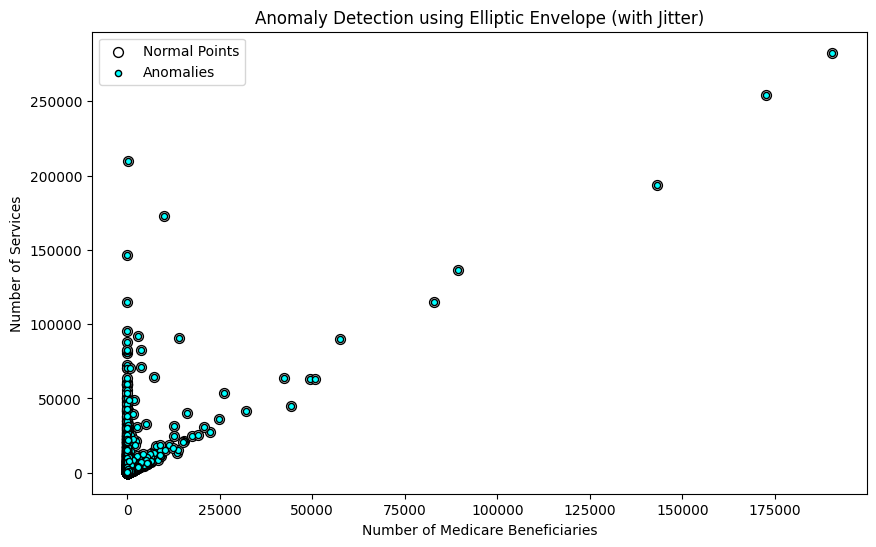

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import EllipticEnvelope
import numpy as np

# Load the dataset
file_path = '/content/Health1.csv'
data = pd.read_csv(file_path)

# Select the two numerical features for visualization
selected_features = [
    'Number of Medicare Beneficiaries', 'Number of Services'
]

# Remove commas and convert columns to numeric
for col in selected_features:
    data[col] = data[col].astype(str).str.replace(',', '')
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Handle missing values
X = data[selected_features]
X = X.dropna()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set contamination level
contamination = 0.1  # Adjust contamination level as needed

# Train the Elliptic Envelope on the full dataset
elliptic_env = EllipticEnvelope(contamination=contamination)
elliptic_env.fit(X_scaled)

# Predict anomalies in the full dataset
y_pred_full = elliptic_env.predict(X_scaled)

# Add the predicted labels to the original dataset
data['Anomaly'] = y_pred_full

# Count the number of anomalies and normal points
num_anomalies = (data['Anomaly'] == -1).sum()
num_normals = (data['Anomaly'] == 1).sum()
print(f"Number of anomalies in the dataset: {num_anomalies}")
print(f"Number of normal points in the dataset: {num_normals}")

# Define a jitter function
def add_jitter(arr, jitter_amount=0.01):
    return arr + np.random.uniform(-jitter_amount, jitter_amount, arr.shape)

# Apply jitter to the data
X_jittered = X.copy()
X_jittered['Number of Medicare Beneficiaries'] = add_jitter(X_jittered['Number of Medicare Beneficiaries'])
X_jittered['Number of Services'] = add_jitter(X_jittered['Number of Services'])

# Visualize the results with jitter
plt.figure(figsize=(10, 6))

# Plot the normal points with jitter
plt.scatter(X_jittered['Number of Medicare Beneficiaries'], X_jittered['Number of Services'],
            c='white', edgecolors='k', s=50, label='Normal Points')

# Plot the anomalies with jitter
plt.scatter(X_jittered[data['Anomaly'] == -1]['Number of Medicare Beneficiaries'],
            X_jittered[data['Anomaly'] == -1]['Number of Services'],
            c='cyan', edgecolors='k', s=20, label='Anomalies')

plt.title('Anomaly Detection using Elliptic Envelope (with Jitter)')
plt.xlabel('Number of Medicare Beneficiaries')
plt.ylabel('Number of Services')
plt.legend()
plt.show()


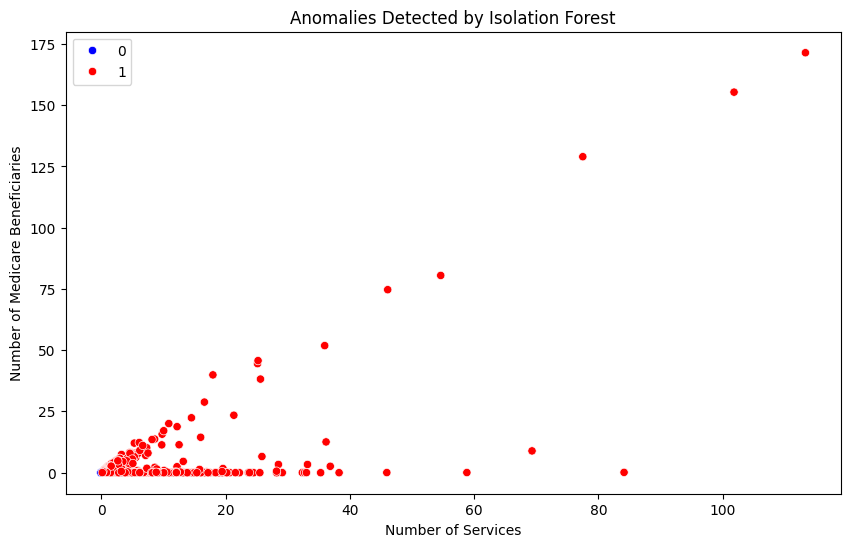

In [48]:
# Plot the scatter plot for Isolation Forest
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Number of Services',
    y='Number of Medicare Beneficiaries',
    hue='anomaly_iso',
    data=data,
    palette={0: 'blue', 1: 'red'},  # Assigning colors to 0 and 1
    hue_order=[0, 1]  # Specify the order of hue values for correct labeling
)
plt.xlabel('Number of Services')
plt.ylabel('Number of Medicare Beneficiaries')
plt.title('Anomalies Detected by Isolation Forest')

# Customize legend labels and colors
plt.legend(title='Anomaly', loc='upper right', labels=['Normal', 'Anomaly'], markerscale=2, fontsize='large')

# Set legend label colors
legend = plt.legend()
for text in legend.get_texts():
    if text.get_text() == 'Normal':
        text.set_color('blue')
    elif text.get_text() == 'Anomaly':
        text.set_color('red')

plt.show()


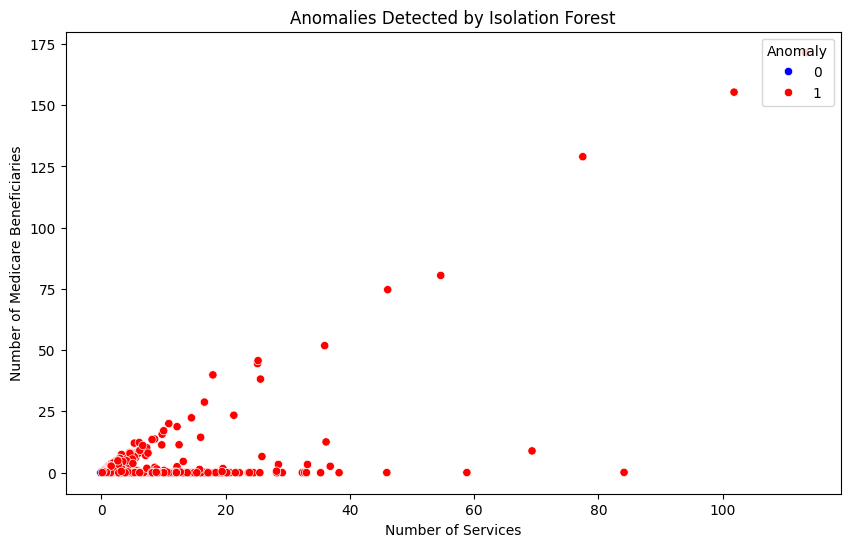

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the scatter plot for Isolation Forest
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Number of Services',
    y='Number of Medicare Beneficiaries',
    hue='anomaly_iso',
    data=data,
    palette={0: 'blue', 1: 'red'}  # corrected the dictionary syntax
)

plt.xlabel('Number of Services')
plt.ylabel('Number of Medicare Beneficiaries')
plt.title('Anomalies Detected by Isolation Forest')
plt.legend(title='Anomaly', loc='upper right')
plt.show()


In [14]:
# Assuming columns 'Gender' and 'Anomaly' exist
gender_anomaly_counts = data.groupby(['Gender of the Provider', 'Anomaly']).size().unstack(fill_value=0)


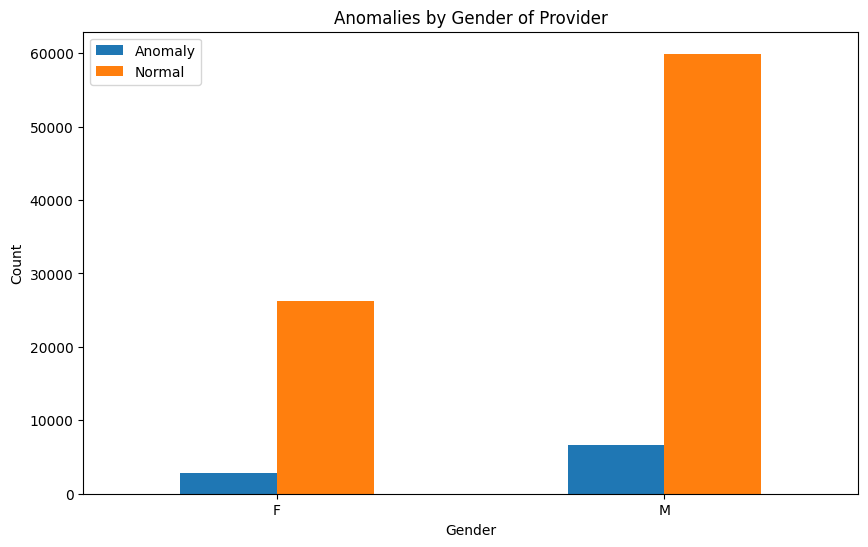

In [17]:
import matplotlib.pyplot as plt

gender_anomaly_counts.plot(kind='bar', figsize=(10, 6))

plt.title('Anomalies by Gender of Provider')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Anomaly')
plt.legend(['Anomaly', 'Normal'])
plt.show()


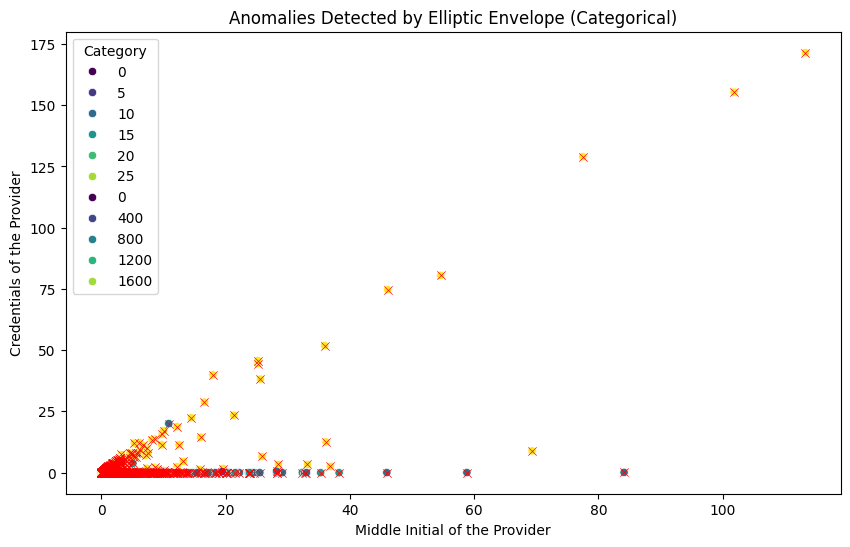

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
data = pd.read_csv("/content/Health1.csv")

# Select the categorical columns
categorical_cols = ["Middle Initial of the Provider", "Credentials of the Provider"]

# Encode the categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Select the numerical columns
numerical_cols = ['Number of Services', 'Number of Medicare Beneficiaries']

# Remove commas and convert to numeric
for col in numerical_cols:
    data[col] = data[col].str.replace(',', '').astype(float)

# Scale numerical features
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Initialize and fit the model
elliptic_env = EllipticEnvelope(contamination=0.1, random_state=42)
elliptic_env.fit(data[numerical_cols])

# Predict anomalies
data['anomaly'] = elliptic_env.predict(data[numerical_cols])
data['anomaly'] = data['anomaly'].map({1: 0, -1: 1})

# Create a scatter plot for Elliptic Envelope, colored by categorical columns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number of Services', y='Number of Medicare Beneficiaries', hue=data['Middle Initial of the Provider'], data=data, palette='viridis')
sns.scatterplot(x='Number of Services', y='Number of Medicare Beneficiaries', hue=data['Credentials of the Provider'], data=data, palette='viridis')

# Add anomaly points with different marker
sns.scatterplot(x=data[data['anomaly'] == 1]['Number of Services'], y=data[data['anomaly'] == 1]['Number of Medicare Beneficiaries'], color='red', marker='x')

plt.xlabel('Middle Initial of the Provider')
plt.ylabel('Credentials of the Provider')
plt.title('Anomalies Detected by Elliptic Envelope (Categorical)')
plt.legend(title='Category')
plt.show()
